# Import Library

In [36]:
import json 
import pandas as pd
import numpy as np
from pathlib import Path
import PIL
from PIL import Image
import os, time, random
import cv2, torch
from tqdm.auto import tqdm
import shutil as sh
from IPython.display import Image, clear_output
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
import torch
from IPython.display import Image  # to display images
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(1) if torch.cuda.is_available() else 'CPU'))

Setup complete. Using torch 1.10.0+cu102 _CudaDeviceProperties(name='GeForce RTX 2080 Ti', major=7, minor=5, total_memory=11019MB, multi_processor_count=68)


## Detection 

In [38]:
## work on yolov5 directory
os.chdir('/home/kannika/yolov5/')

> ## Predict with **Confident ScoreThr == 0.0 - 1.0**

In [39]:
###  --iou-thres 0.45 **** -------------Seting -------****
## test set 10 Images
threshold_score = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
name = ['0','01','02','03','04','05','06','07','08','09']
for i, j in zip(threshold_score, name):
    !python detect.py --weights /media/tohn/SSD/YOLOv5/model_5x/prostate/prostateOrigin_e400/weights/ModelR1_Prostate5x_last.pt --img 640 --source /media/tohn/SSD/ProstateCancer/test --iou-thres 0.50 --conf-thres {i} --device 1 --save-txt --save-conf --save-crop --project /media/tohn/SSD/YOLOv5/result_5x/prostate50/scorethr_e400 --name PCI{j}

detect: weights=['/media/tohn/SSD/YOLOv5/model_5x/prostate/prostateOrigin_e400/weights/ModelR1_Prostate5x_last.pt'], source=/media/tohn/SSD/ProstateCancer/test, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.0, iou_thres=0.5, max_det=1000, device=1, view_img=False, save_txt=True, save_conf=True, save_crop=True, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=/media/tohn/SSD/YOLOv5/result_5x/prostate50/scorethr_e400, name=PCI0, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.0-171-g5bd6a97 torch 1.10.0+cu102 CUDA:1 (GeForce RTX 2080 Ti, 11019MiB)

Fusing layers... 
Model Summary: 444 layers, 86173414 parameters, 0 gradients, 204.0 GFLOPs
image 1/10 /media/tohn/SSD/ProstateCancer/test/prostate_custom_191.jpg: 544x640 1000 prostates, Done. (0.030s)
image 2/10 /media/tohn/SSD/ProstateCancer/test/prostate_custom_194.jpg: 544x640 1000 prostates, Done. (0.030s)
image 3/10 /med

detect: weights=['/media/tohn/SSD/YOLOv5/model_5x/prostate/prostateOrigin_e400/weights/ModelR1_Prostate5x_last.pt'], source=/media/tohn/SSD/ProstateCancer/test, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.5, max_det=1000, device=1, view_img=False, save_txt=True, save_conf=True, save_crop=True, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=/media/tohn/SSD/YOLOv5/result_5x/prostate50/scorethr_e400, name=PCI04, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.0-171-g5bd6a97 torch 1.10.0+cu102 CUDA:1 (GeForce RTX 2080 Ti, 11019MiB)

Fusing layers... 
Model Summary: 444 layers, 86173414 parameters, 0 gradients, 204.0 GFLOPs
image 1/10 /media/tohn/SSD/ProstateCancer/test/prostate_custom_191.jpg: 544x640 Done. (0.030s)
image 2/10 /media/tohn/SSD/ProstateCancer/test/prostate_custom_194.jpg: 544x640 Done. (0.029s)
image 3/10 /media/tohn/SSD/ProstateCancer/test

YOLOv5 🚀 v6.0-171-g5bd6a97 torch 1.10.0+cu102 CUDA:1 (GeForce RTX 2080 Ti, 11019MiB)

Fusing layers... 
Model Summary: 444 layers, 86173414 parameters, 0 gradients, 204.0 GFLOPs
image 1/10 /media/tohn/SSD/ProstateCancer/test/prostate_custom_191.jpg: 544x640 Done. (0.030s)
image 2/10 /media/tohn/SSD/ProstateCancer/test/prostate_custom_194.jpg: 544x640 Done. (0.030s)
image 3/10 /media/tohn/SSD/ProstateCancer/test/prostate_custom_196.jpg: 544x640 Done. (0.029s)
image 4/10 /media/tohn/SSD/ProstateCancer/test/prostate_custom_197.jpg: 544x640 2 prostates, Done. (0.029s)
image 5/10 /media/tohn/SSD/ProstateCancer/test/prostate_custom_198.jpg: 544x640 Done. (0.027s)
image 6/10 /media/tohn/SSD/ProstateCancer/test/prostate_custom_200.jpg: 544x640 Done. (0.022s)
image 7/10 /media/tohn/SSD/ProstateCancer/test/prostate_custom_201.jpg: 544x640 1 prostate, Done. (0.022s)
image 8/10 /media/tohn/SSD/ProstateCancer/test/prostate_custom_203.jpg: 544x640 Done. (0.022s)
image 9/10 /media/tohn/SSD/ProstateCa

### Load  label .txt to .CSV

In [40]:
##  get label predict in Directory 
## convert .txt to .csv 
import glob
import csv

def create_file(name):
    ## get label predict in Directory
    PATH = f'/media/tohn/SSD/YOLOv5/result/prostate/scorethr_e400/{name}/labels/'
    path_txt = glob.glob(f"{PATH}*.txt")
    os.chdir(PATH)
    for p in path_txt:
        with open(p, 'r') as in_file:
            stripped = (line.strip() for line in in_file)
            lines = (line.split(" ") for line in stripped if line)
            name = p.split('.')[0]
            name = name +'.csv'
            with open(name, 'w') as out_file:
                writer = csv.writer(out_file)
                writer.writerow(('class', 'x-center', 'y-center', 'w', 'h', 'conf'))
                writer.writerows(lines)   

In [41]:
##### Concat CSV to 1 file
def concat_df(PATH, name_i) : ##path/to/lable/.csv/  ## name/scorethr/ 
    path_csv = glob.glob(f"{PATH}*.csv")
    df_  = list()
    for c in path_csv:
        df = pd.read_csv(c)
        image = c.split('/')[-1]
        image = image.split('.')[0]+'.jpg'
        df['fileName'] = image
        df_.append(df)
    all_csv = pd.concat(df_ ,axis=0).reset_index(drop=True)
    all_csv.to_csv(f'{PATH}prostate_custom_{name_i}.csv')
    ## Return/csv/table/all/score/thr
    return all_csv 

In [6]:
# DataFrame0 = pd.read_csv('/media/tohn/SSD/YOLOv5/result/prostate/scorethr_e400/PCI0/labels/prostate_custom_PCI0.csv')
# print(DataFrame0.shape)
# DataFrame0

### Rebox: Easily convert between bounding box formats

In [42]:
from rebox import BBox
from rebox.formats import yolo, coco, pascal

# DataFrame0 = all_csv
def rebox(DataFrame0) :  ## DataFrame0 from concat_df
    Opath = '/media/tohn/SSD/ProstateCancer/test/'
    ###เก็บค่า shape imagesของ GT Bbox
    image_width_ = list()  #-- shape[1]
    image_height_ = list()  #-- shape[0]
    # image_height = 640 # pixels
    # image_width = 640 # pixels
    x_min_ = list()
    y_min_ = list()
    x_MAX_= list()
    y_MAX_ = list()

    for i in range(len(DataFrame0)) :
        x_Center = DataFrame0['x-center'][i] 
        y_Center = DataFrame0['y-center'][i]
        width = DataFrame0['w'][i] 
        height  = DataFrame0['h'][i]
        img_path_i = Opath+DataFrame0.fileName[i]
        image_width = cv2.imread(img_path_i).shape[1]
        image_height = cv2.imread(img_path_i).shape[0]
        yolo_bbox = BBox([x_Center, y_Center, width, height], yolo) # using built-in 'yolo_format'
        coco_bbox = yolo_bbox.as_format(coco, image_width, image_height) # to convert to built-in format 'coco'
        pascal_bbox = coco_bbox.as_format(pascal)
        bbox = pascal_bbox.value
        x_min = bbox[0]
        x_min_.append(x_min)
        y_min = bbox[1]
        y_min_.append(y_min)
        x_MAX = bbox[2]
        x_MAX_.append(x_MAX)
        y_MAX = bbox[3]
        y_MAX_.append(y_MAX)

    DataFrame0['pred_xmin'] = x_min_
    DataFrame0['pred_ymin'] = y_min_
    DataFrame0['pred_xmax'] = x_MAX_
    DataFrame0['pred_ymax'] = y_MAX_

    return DataFrame0 

In [10]:
# table = rebox(DataFrame0)
# print(table.shape)
# table

> #### 1. Get Predict Bbox to 1 row

In [43]:
#รวม prediction box ใน 1 image 
def Get_1boxPre(table) :
    a = table.groupby(['fileName']).count()
    a = table.iloc[:,0]
    aa_ =[]
    for  i in  range(len(a)):
        aa = a[i]
        aa_.append(aa)
    name = sorted(list(set(table['fileName'])))

    fileName_, x1s_, y1s_, x2s_, y2s_, score_, =[], [], [], [], [], []
    for j in name:
        x1_, y1_, x2_, y2_, score = [], [], [], [], []
        fileName_.append(j)
        for i in range(len(table)):
            fileName = table['fileName'][i]
            if fileName == j:
                x1_.append(table['pred_xmin'][i])
                y1_.append(table['pred_ymin'][i])
                x2_.append(table['pred_xmax'][i])
                y2_.append(table['pred_ymax'][i])
                score.append(table['conf'][i])

        x1s_.append(x1_)
        y1s_.append(y1_)
        x2s_.append(x2_)
        y2s_.append(y2_)
        score_.append(score)

    result = {'fileName': fileName_, 'pred_xmin': x1s_,'pred_ymin': y1s_,'pred_xmax': x2s_,'pred_ymax': y2s_, 'pred_score': score_}
    result = pd.DataFrame(result, columns=['fileName', 'pred_xmin','pred_ymin','pred_xmax','pred_ymax', 'pred_score','pred_count'])

    count_ = list()
    for k in range(len(result)):
        count = len(result['pred_score'][k])
        count_.append(count)

    result['pred_count'] = count_

    return result 

In [12]:
# table1 = Get_1boxPre(DataFrame0)
# table1.shape
# table1

> #### 2. Get Actual Bbox to 1 row

In [44]:
#รวม actual box ใน 1 image 
def Get_1boxAct(test) :
    a = test.groupby(['image']).count()
    a = a.iloc[:,0]
    aa_ = []
    for  i in  range(len(a)):
        aa = a[i]
        aa_.append(aa)
    name = sorted(list(set(test['image'])))
    path = sorted(list(set(test['img_path'])))

    fileName_, x1s_, y1s_, x2s_, y2s_ = [], [], [], [], []
    for j in name:
        x1_, y1_, x2_, y2_ = [], [], [], []
        fileName_.append(j)
        for i in range(len(test)):
            fileName = test['image'][i] 
            if fileName == j:
                x1_.append(test['xmin'][i])
                y1_.append(test['ymin'][i])
                x2_.append(test['xmax'][i])
                y2_.append(test['ymax'][i])

        x1s_.append(x1_)
        y1s_.append(y1_)
        x2s_.append(x2_)
        y2s_.append(y2_)
        #Path_.append(test['img_path'][i])

    test_ = {'fileName': fileName_, 'Path':path, 'gt_xmin': x1s_,'gt_ymin': y1s_,'gt_xmax': x2s_,'gt_ymax': y2s_, 'count': aa_}
    test_ = pd.DataFrame(test_, columns=['fileName', 'Path', 'gt_xmin','gt_ymin','gt_xmax','gt_ymax', 'count'])

#     print(test_.shape)
#     test_.head()
    return test_

In [45]:
test = pd.read_csv('/media/tohn/SSD/ProstateCancer/prostate_test_mapping.csv')
test_ = Get_1boxAct(test)
print(test_.shape)
test_.head()

(10, 7)


,fileName,Path,gt_xmin,gt_ymin,gt_xmax,gt_ymax,count
0,prostate_custom_191.jpg,/media/tohn/SSD/ProstateCancer/test/prostate_c...,"[468.0, 470.0, 351.0]","[309.0, 385.0, 374.0]","[549.0, 551.0, 390.0]","[367.0, 411.0, 432.0]",3
1,prostate_custom_194.jpg,/media/tohn/SSD/ProstateCancer/test/prostate_c...,"[385.0, 512.0]","[392.0, 362.0]","[442.0, 544.0]","[452.0, 403.0]",2
2,prostate_custom_196.jpg,/media/tohn/SSD/ProstateCancer/test/prostate_c...,[572.0],[408.0],[614.0],[501.0],1
3,prostate_custom_197.jpg,/media/tohn/SSD/ProstateCancer/test/prostate_c...,[437.0],[382.0],[518.0],[430.0],1
4,prostate_custom_198.jpg,/media/tohn/SSD/ProstateCancer/test/prostate_c...,"[510.0, 527.0]","[436.0, 362.0]","[544.0, 553.0]","[475.0, 404.0]",2


In [46]:
def map_table(test_, result_rebox) :## Paremeter -->>> test_ == test dataframe, result == predict dataframe 
    ## merge table 
    df_merge = pd.merge(test_, result_rebox, how="outer", on=["fileName", "fileName"])

    return df_merge

In [47]:
#tb = df_merge
def fill_(df_merge):
    columns_ = ['pred_xmin', 'pred_ymin', 'pred_xmax', 'pred_ymax', 'pred_score']
    for col in columns_: 
        for row in df_merge.loc[df_merge[col].isnull(), col].index:   ##for columns type is list 
            df_merge.at[row, col] = []

    for row in df_merge.loc[df_merge.pred_count.isnull(), 'pred_count'].index: ##for columns type is float
        df_merge.at[row, 'pred_count'] = 0

    return df_merge

In [17]:
# df_merge = map_table(test_, table1)
# result = fill_(df_merge)
# print(result.shape)
# result

# Prediction function

In [48]:
def IoUfunction(res):
    pre_ ,  gt_ = [], []
    i = 0

    for j in range(len(res['pred_xmin'].tolist()[i])):
        xmin_pre = int(res['pred_xmin'].tolist()[i][j])
        ymin_pre = int(res['pred_ymin'].tolist()[i][j])
        xmax_pre = int(res['pred_xmax'].tolist()[i][j])
        ymax_pre = int(res['pred_ymax'].tolist()[i][j])
        pre = [xmin_pre, ymin_pre, xmax_pre, ymax_pre]
        pre_.append(pre)

    for j in range(len(res['gt_xmin'].tolist()[i])):
        xmin_gt= int(res['gt_xmin'].tolist()[i][j])
        ymin_gt = int(res['gt_ymin'].tolist()[i][j])
        xmax_gt= int(res['gt_xmax'].tolist()[i][j])
        ymax_gt = int(res['gt_ymax'].tolist()[i][j])
        gt = [xmin_gt, ymin_gt, xmax_gt, ymax_gt]
        gt_.append(gt)

    #ป้องกัน ไม่มีผล predict
    if pre_ == []:   ##if pre_ == np.NaN ## check NaN value()
        iou_pred = torch.tensor([0], dtype=torch.float)
        iou_gt = torch.tensor([0], dtype=torch.float)
    else:
        box1 = torch.tensor(pre_, dtype=torch.float)
        box2 = torch.tensor(gt_, dtype=torch.float)
        iou_pred = bops.box_iou(box1, box2)
        iou_gt = bops.box_iou(box2, box1)

    return iou_pred, iou_gt

In [49]:
import torch
import torchvision.ops.boxes as bops

def EvaluationTeble(result, threshold_iou):
    IoU_pred, IoUavg_img_ = [], []
    fileName = result['fileName'].tolist()

    TP, FP, FN = [], [], []
    for i in fileName:   
        #IoU Function
        res = result[result['fileName'] == i ]
        Gt_count = res['count'].tolist()[0]
        pre_count = res['pred_count'].tolist()[0]
        iou_pred, iou_gt = IoUfunction(res)
        
        if pre_count == 0 :
            TP.append(0)
            FP.append(0)
            FN.append(Gt_count) 
            IoU_pred.append(torch.tensor([0], dtype=torch.float))
        else:
            '''Box Predict checking '''
#             iou_PdGt_ = []
#             IoUavg_im = []
            iou_tp_ =  []
            iou_fp_ =  []
            '''1 . TP = number of detections with IoU>=0.5 '''
            for i in range(len(iou_pred)):  ### 
                iou_tp = max(iou_pred[i])
                if iou_tp == threshold_iou:
                    iou_tp = 1
                    iou_tp_.append(iou_tp)
                elif iou_tp > threshold_iou:
                    iou_tp = 1
                    iou_tp_.append(iou_tp)

            ''' 2 . FP = number of detections with IoU<0.5 or detected more than once '''
            for i in range(len(iou_pred)):  ### 
                iou_fp = max(iou_pred[i])
                if iou_fp < threshold_iou:
                    iou_fp = 0
                    iou_fp_.append(iou_fp)
            #TP,FP
            tp, fp = 0, 0
            for i in list(set(iou_tp_)):
                if len(iou_tp_) != 0:
                    i==1
                    tp = iou_tp_.count(i)
                else:
                    tp=0
                    
            for j in list(set(iou_fp_)):
                if len(iou_fp_) != 0:
                    j==0
                    fp = iou_fp_.count(j)
                else:
                    fp=0
                    
            if tp > Gt_count:
                tp_gt = tp-Gt_count
                tp = Gt_count
                fp = fp+tp_gt

            ''' 3 . FN = number of detections with IoU<0.5 '''
            fn = Gt_count-tp            
            ## Append to performance list 
            TP.append(tp)
            FP.append(fp)
            FN.append(fn) 
            IoU_pred.append(iou_pred)

    result['IoU_img'] = IoU_pred
    result['TP'] = TP
    result['FP'] = FP
    result['FN'] = FN
#     ###Check TP
#     for i in range(len(result)) :
#         if result['TP'][i] > result['count'][i]:
#             result.loc[result.index[i], 'TP'] = result['count'][i]

    return result

In [20]:
# threshold_iou = 0.50
# Eva_test = EvaluationTeble(result, threshold_iou)
# print(Eva_test.shape)
# Eva_test

> # Finding the best threshold

In [50]:
import glob
import csv

##Import Test set dataframe
test = pd.read_csv('/media/tohn/SSD/ProstateCancer/prostate_test_mapping.csv')
threshold_score = [0.00, 0.10 ,0.20 ,0.30 ,0.40 ,0.50 ,0.60 ,0.70 ,0.80 ,0.90]
name_thr = ['PCI0','PCI01','PCI02','PCI03','PCI04','PCI05','PCI06','PCI07','PCI08','PCI09']
precision_, recall_, sum_TP_, sum_FP_, sum_FN_, sum_count_, sum_pred_count_ ,name_thr_, threshold_score_ = [],[],[],[],[],[],[],[],[]
sum_count, sum_pred_count = [],[]
threshold_iou = 0.50
### Check file 
for i, n in zip(range(len(threshold_score)), range(len(name_thr))):
    name_i = name_thr[n]
    threshold_score_i = threshold_score[i]
    PATH = f'/media/tohn/SSD/YOLOv5/result_5x/prostate50/scorethr_e400/{name_i}/labels/'
    path_txt = glob.glob(f"{PATH}*.txt")
    if len(path_txt) != 0:
        #name.remove(n) 
        os.chdir(PATH)
        for p in path_txt:
            with open(p, 'r') as in_file:
                stripped = (line.strip() for line in in_file)
                lines = (line.split(" ") for line in stripped if line)
                name = p.split('.')[0]
                name = name +'.csv'
                with open(name, 'w') as out_file:
                    writer = csv.writer(out_file)
                    writer.writerow(('class', 'x-center', 'y-center', 'w', 'h', 'conf'))
                    writer.writerows(lines) 
            
        DataFrame0  = concat_df(PATH, name_i) 
        table = rebox(DataFrame0)
        result_rebox = Get_1boxPre(table)
        test_ = Get_1boxAct(test)
        df_merge = map_table(test_, result_rebox)
        result = fill_(df_merge)
        Eva_table = EvaluationTeble(result, threshold_iou)
        ### Calculate perfermance matrix 
        sum_TP = sum(list(Eva_table.TP))
        sum_FP = sum(list(Eva_table.FP))
        sum_FN = sum(list(Eva_table.FN))
        sum_count = sum(list(Eva_table['count']))
        sum_pred_count = sum(list(Eva_table.pred_count))
        recall = sum_TP/(sum_TP+sum_FN)
        precision = sum_TP/(sum_TP+sum_FP)
        ### Append perfermance to list 
        precision_.append(precision)
        recall_.append(recall)
        sum_TP_.append(sum_TP)
        sum_FP_.append(sum_FP)
        sum_FN_.append(sum_FN)
        sum_count_.append(sum_count)
        sum_pred_count_.append(sum_pred_count)
    elif len(path_txt) == 0:
        sum_TP = 0
        sum_FP = 0
        sum_FN = 0
        recall = 0
        precision = 0
        sum_pred_count = 0
        sum_count = sum(list(test_['count']))
        ### Append perfermance to list 
        precision_.append(precision)
        recall_.append(recall)
        sum_TP_.append(sum_TP)
        sum_FP_.append(sum_FP)
        sum_FN_.append(sum_FN)
        sum_count_.append(sum_count)
        sum_pred_count_.append(sum_pred_count)
        
    name_thr_.append(name_i)
    threshold_score_ .append(threshold_score_i)

In [51]:
print(len(precision_))
print(len(recall_))
print(len(sum_TP_))
print(len(sum_FP_))
print(len(sum_FN_))
print(len(sum_count_))
print(len(sum_pred_count_))
print(len(threshold_score_))

10
10
10
10
10
10
10
10


In [52]:
precision_

[0.0016,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6]

In [53]:
recall_

[0.8421052631578947,
 0.21052631578947367,
 0.21052631578947367,
 0.21052631578947367,
 0.21052631578947367,
 0.21052631578947367,
 0.21052631578947367,
 0.21052631578947367,
 0.21052631578947367,
 0.15789473684210525]

In [54]:
i = np.arange(len(threshold_score_))
roc0 = pd.DataFrame({'Threshold' : pd.Series(threshold_score_, index=i),'Precision' : pd.Series(precision_, index = i),'Recall' : pd.Series(recall_, index = i),
                     'TP' : pd.Series(sum_TP_, index = i), 'FP' : pd.Series(sum_FP_, index = i), 'FN' : pd.Series(sum_FN_, index = i), 
                     'GT count' : pd.Series(sum_count_, index = i), 'Pre count' : pd.Series(sum_pred_count_, index = i)})
roc0

,Threshold,Precision,Recall,TP,FP,FN,GT count,Pre count
0,0.0,0.001600,0.842105,16,9984,3,19,10000.0
1,0.1,0.666667,0.210526,4,2,15,19,6.0
2,0.2,0.666667,0.210526,4,2,15,19,6.0
3,0.3,0.666667,0.210526,4,2,15,19,6.0
4,0.4,0.666667,0.210526,4,2,15,19,6.0
5,0.5,0.666667,0.210526,4,2,15,19,6.0
6,0.6,0.666667,0.210526,4,2,15,19,6.0
7,0.7,0.666667,0.210526,4,2,15,19,6.0
8,0.8,0.666667,0.210526,4,2,15,19,6.0
9,0.9,0.600000,0.157895,3,2,16,19,5.0


In [55]:
fix_value = [{'Threshold':1.000,'Precision':1.000,'Recall':0.000}]
roc0 = roc0.append(fix_value,ignore_index=True,sort=False)
#roc0 = roc0.apply(np.roll, shift=-1) #move he last row to the first

roc0 = roc0.sort_values(by='Threshold', ascending=True)
#fix_value = [{'Threshold':0.000,'Precision':0.000,'Recall':1.000}]
#roc0 = roc0.append(fix_value,ignore_index=True,sort=False)
#roc0 = roc0.apply(np.roll, shift=1) #move he last row to the first
roc0.loc[roc0.index[-1], 'TP'] = 0
roc0.loc[roc0.index[-1], 'FP'] = 0
roc0.loc[roc0.index[-1], 'FN'] = 0
roc0.loc[roc0.index[-1], 'GT count'] = 19
roc0.loc[roc0.index[-1], 'Pre count'] = 0
roc0

,Threshold,Precision,Recall,TP,FP,FN,GT count,Pre count
0,0.0,0.001600,0.842105,16.0,9984.0,3.0,19.0,10000.0
1,0.1,0.666667,0.210526,4.0,2.0,15.0,19.0,6.0
2,0.2,0.666667,0.210526,4.0,2.0,15.0,19.0,6.0
3,0.3,0.666667,0.210526,4.0,2.0,15.0,19.0,6.0
4,0.4,0.666667,0.210526,4.0,2.0,15.0,19.0,6.0
5,0.5,0.666667,0.210526,4.0,2.0,15.0,19.0,6.0
6,0.6,0.666667,0.210526,4.0,2.0,15.0,19.0,6.0
7,0.7,0.666667,0.210526,4.0,2.0,15.0,19.0,6.0
8,0.8,0.666667,0.210526,4.0,2.0,15.0,19.0,6.0
9,0.9,0.600000,0.157895,3.0,2.0,16.0,19.0,5.0


In [28]:
# roc0 = roc0.sort_values(by='Threshold', ascending=True)
# #fix_value = [{'Threshold':0.000,'Precision':0.000,'Recall':1.000}]
# #roc0 = roc0.append(fix_value,ignore_index=True,sort=False)
# #roc0 = roc0.apply(np.roll, shift=1) #move he last row to the first
# roc0.loc[roc0.index[-1], 'Precision'] = 1.000
# roc0.loc[roc0.index[-1], 'Recall'] = 0.000
# roc0.loc[roc0.index[-1], 'TP'] = 0
# roc0.loc[roc0.index[-1], 'FP'] = 0
# roc0.loc[roc0.index[-1], 'FN'] = 0
# roc0.loc[roc0.index[-1], 'GT count'] = 19
# roc0.loc[roc0.index[-1], 'Pre count'] = 0
# roc0

In [56]:
Prec = roc0['Precision'].tolist()
rec = roc0['Recall'].tolist()
rec = np.array(rec)
Prec = np.array(Prec)

from sklearn import metrics
#auc = metrics.auc(Prec, rec)
auc = metrics.auc(rec, Prec)
print("Area Under Curve: %0.4f" % auc)

Area Under Curve: 0.3707


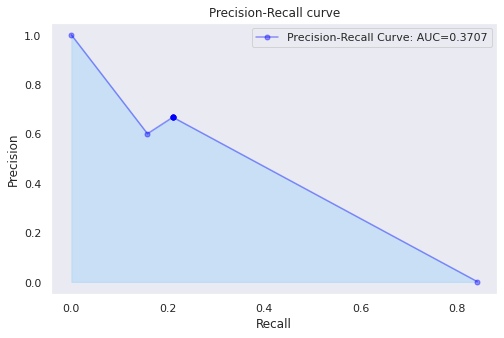

In [57]:
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(8, 5))
# plotting points as a scatter plot
plt.fill_between(rec, Prec, color='#95d0fc', alpha=0.4)
plt.plot(rec, Prec, label= "Precision-Recall Curve: AUC=%0.4f"%auc, color= "blue",
                marker= ".",markerfacecolor='blue', markersize=10, alpha=0.4)

# x-axis label
plt.xlabel('Recall')
# frequency label
plt.ylabel('Precision')
# plot title
plt.title('Precision-Recall curve')
# showing legend
plt.legend()

# function to show the plot
plt.show()

# Selection Best Threshold  == 0.10

In [58]:
DataFrame0  = pd.read_csv(f'/media/tohn/SSD/YOLOv5/result_5x/prostate50/scorethr_e400/PCI08/labels/prostate_custom_PCI08.csv')
table = rebox(DataFrame0)
result_rebox = Get_1boxPre(table)
test_ = Get_1boxAct(test)
df_merge = map_table(test_, result_rebox)
result = fill_(df_merge)
Eva_table = EvaluationTeble(result, threshold_iou)
### Calculate perfermance matrix 
sum_TP = sum(list(Eva_table.TP))
sum_FP = sum(list(Eva_table.FP))
sum_FN = sum(list(Eva_table.FN))
sum_count = sum(list(Eva_table['count']))
sum_pred_count = sum(list(Eva_table.pred_count))
recall = sum_TP/(sum_TP+sum_FN)
precision = sum_TP/(sum_TP+sum_FP)
### Append perfermance to list 
precision_.append(precision)
recall_.append(recall)
sum_TP_.append(sum_TP)
sum_FP_.append(sum_FP)
sum_FN_.append(sum_FN)
sum_count_.append(sum_count)
sum_pred_count_.append(sum_pred_count)

## Show Performance Result

In [59]:
IoU_pred = Eva_table['IoU_img'].tolist()
aa = []
for m in IoU_pred: 
    if m.shape[0] >1:
        a_ =[]
        for i in range(m.shape[1]):
            a = max(m[0][i],m[1][i])
            a_.append(float(a))
        a = np.mean(a_)
        aa.append(a)
    else:
        a = m.mean()
        aa.append(float(a))

print('\n', 'IoU :', aa)
print('\n', 'IoU Avg :', np.mean(aa))


 IoU : [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.39024388790130615, 0.0, 0.646039605140686, 0.42566851774851483]

 IoU Avg : 0.1461952010790507


In [66]:
print(f'True Positive ** SUM = {sum_TP}')
print(f'{list(Eva_table.TP)}')
print('-' * 50)
print(f'False  Positive ** SUM = {sum_FP}')
print(f'{list(Eva_table.FP)}')
print('-' * 50)
print(f'False Negative  ** SUM = {sum_FN}')
print(f'{list(Eva_table.FN)}\n')
print('-' * 50)
print(f'Precision ** : {precision}\n')
print(f'Recall ** : {recall}\n')
print('-' * 50)

print(f' Result Dataframe {Eva_table.shape}')
Eva_table

True Positive ** SUM = 4
[0, 0, 0, 0, 0, 0, 1, 0, 1, 2]
--------------------------------------------------
False  Positive ** SUM = 2
[0, 0, 0, 2, 0, 0, 0, 0, 0, 0]
--------------------------------------------------
False Negative  ** SUM = 15
[3, 2, 1, 1, 2, 1, 1, 3, 0, 1]

--------------------------------------------------
Precision ** : 0.6666666666666666

Recall ** : 0.21052631578947367

--------------------------------------------------
 Result Dataframe (10, 17)


,fileName,Path,gt_xmin,gt_ymin,gt_xmax,gt_ymax,count,pred_xmin,pred_ymin,pred_xmax,pred_ymax,pred_score,pred_count,IoU_img,TP,FP,FN
0,prostate_custom_191.jpg,/media/tohn/SSD/ProstateCancer/test/prostate_c...,"[468.0, 470.0, 351.0]","[309.0, 385.0, 374.0]","[549.0, 551.0, 390.0]","[367.0, 411.0, 432.0]",3,[],[],[],[],[],0.0,[tensor(0.)],0,0,3
1,prostate_custom_194.jpg,/media/tohn/SSD/ProstateCancer/test/prostate_c...,"[385.0, 512.0]","[392.0, 362.0]","[442.0, 544.0]","[452.0, 403.0]",2,[],[],[],[],[],0.0,[tensor(0.)],0,0,2
2,prostate_custom_196.jpg,/media/tohn/SSD/ProstateCancer/test/prostate_c...,[572.0],[408.0],[614.0],[501.0],1,[],[],[],[],[],0.0,[tensor(0.)],0,0,1
3,prostate_custom_197.jpg,/media/tohn/SSD/ProstateCancer/test/prostate_c...,[437.0],[382.0],[518.0],[430.0],1,"[497.978, 381.986]","[293.976, 381.024]","[517.0415, 426.02]","[327.024, 429.984]","[0.926118, 0.96539]",2.0,"[[tensor(0.)], [tensor(0.)]]",0,2,1
4,prostate_custom_198.jpg,/media/tohn/SSD/ProstateCancer/test/prostate_c...,"[510.0, 527.0]","[436.0, 362.0]","[544.0, 553.0]","[475.0, 404.0]",2,[],[],[],[],[],0.0,[tensor(0.)],0,0,2
5,prostate_custom_200.jpg,/media/tohn/SSD/ProstateCancer/test/prostate_c...,[403.0],[208.0],[462.0],[240.0],1,[],[],[],[],[],0.0,[tensor(0.)],0,0,1
6,prostate_custom_201.jpg,/media/tohn/SSD/ProstateCancer/test/prostate_c...,"[413.0, 464.0]","[291.0, 294.0]","[445.0, 501.0]","[319.0, 327.0]",2,[410.9718],[291.024],[451.023],[319.032],[0.930066],1.0,"[[tensor(0.7805), tensor(0.)]]",1,0,1
7,prostate_custom_203.jpg,/media/tohn/SSD/ProstateCancer/test/prostate_c...,"[437.0, 420.0, 411.0]","[313.0, 386.0, 250.0]","[475.0, 461.0, 458.0]","[359.0, 408.0, 293.0]",3,[],[],[],[],[],0.0,[tensor(0.)],0,0,3
8,prostate_custom_206.jpg,/media/tohn/SSD/ProstateCancer/test/prostate_c...,[371.0],[352.0],[429.0],[404.0],1,[366.0036],[353.016],[430.014],[389.016],[0.8944219999999999],1.0,[[tensor(0.6460)]],1,0,0
9,prostate_custom_207.jpg,/media/tohn/SSD/ProstateCancer/test/prostate_c...,"[363.0, 503.0, 447.0]","[312.0, 322.0, 407.0]","[410.0, 532.0, 512.0]","[372.0, 372.0, 439.0]",3,"[441.0102, 360.0138]","[398.016, 319.032]","[526.0296, 405.9654]","[439.992, 367.992]","[0.901124, 0.970087]",2.0,"[[tensor(0.), tensor(0.), tensor(0.5968)], [te...",2,0,1


In [67]:
print(f'Number** Bbox Prediction TP : {int(sum(Eva_table.TP))}\n')
sum_count0 = sum(list(Eva_table['count']))
print(f'Number** Bbox ground Truth : {int(sum_count0)}')

Number** Bbox Prediction TP : 4

Number** Bbox ground Truth : 19


In [68]:
neg = np.array([[0, sum_FP]]) ## TN=0, FP 
pos = np.array([[sum_FN, sum_TP]]) ## FN, TP
cf_matrix = np.concatenate((neg, pos), axis=0)
cf_matrix
print(cf_matrix)
#labels = [‘True Neg’,’False Pos’,’False Neg’,’True Pos’]

[[ 0  2]
 [15  4]]


Text(0.5, 21.5, 'Predicted label')

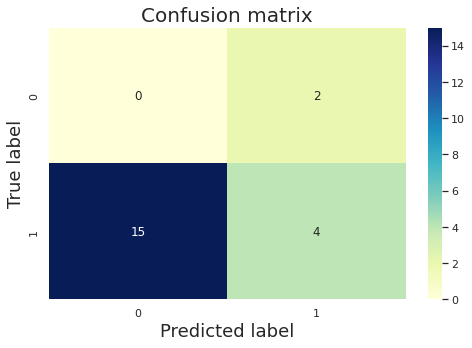

In [69]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
fig, ax = plt.subplots(figsize=(8, 5))

ax = sns.heatmap(cf_matrix, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

Text(0.5, 1.0, 'Confusion Matrix')

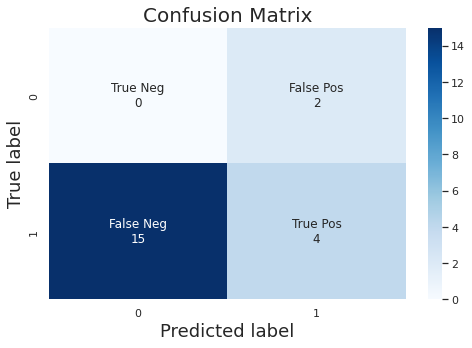

In [70]:
group_names = ['True Neg','False Pos','False Neg','True Pos' ]
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
#xyplotlabels = ['True Label' ,'Predicted Label']
# group_percentages = ['{0:.2%}'.format(value) for value in
#                      cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize=(8,5))
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
plt.ylabel('True label',fontsize=18)
plt.xlabel('Predicted label', fontsize=18)
plt.title('Confusion Matrix', fontsize=20)

# Plot img Prediction

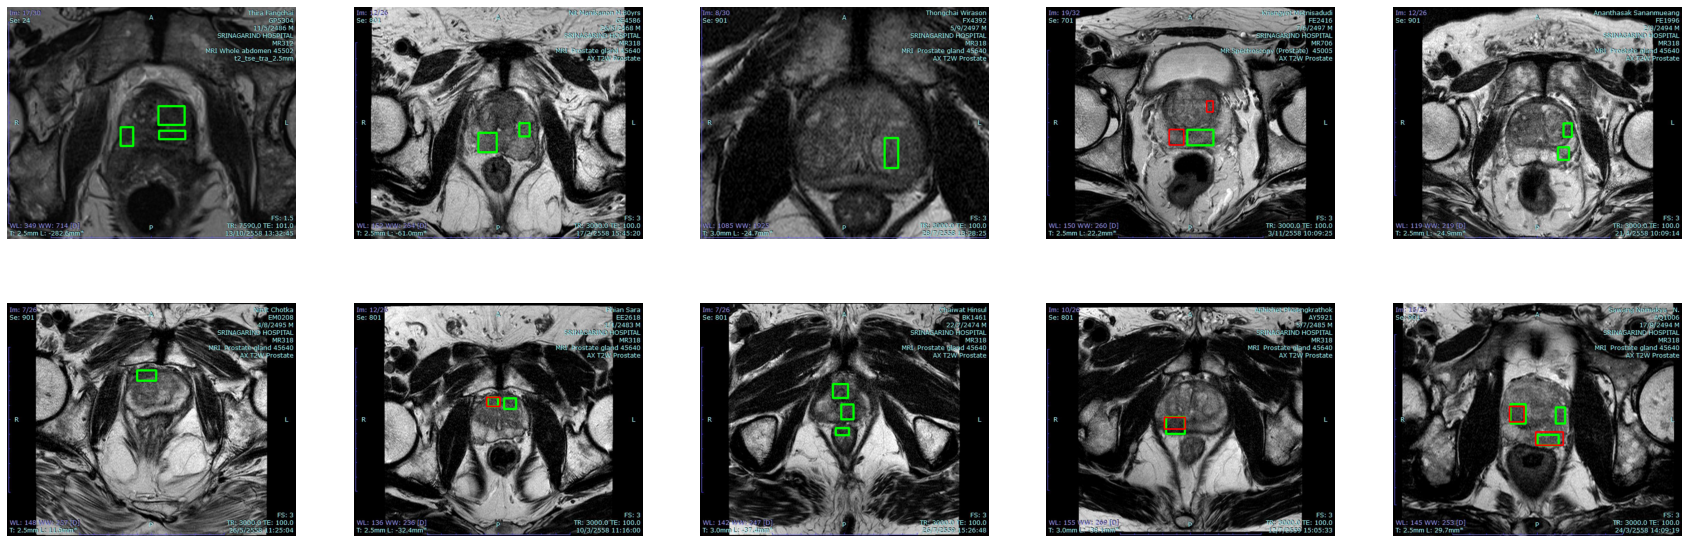

In [71]:
# Plot img Prediction
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams["axes.grid"] = False

res = Eva_table
w = 20
h = 20
fig = plt.figure(figsize=(30, 10))
columns = 5
rows = 2

fileName = Eva_table['fileName'].tolist()
for m in range(1, columns*rows +1):
    res = Eva_table[Eva_table['fileName'] ==fileName[m-1]]

    i = 0
    #load image origin save to test.jpg
    import cv2
    from IPython.display import Image
    img_path = res['Path'].tolist()[0]
    img_c = cv2.imread(img_path)

    for j in range(len(res['gt_xmin'].tolist()[i])):
        xmin_pre = int(res['gt_xmin'].tolist()[i][j])
        ymin_pre = int(res['gt_ymin'].tolist()[i][j])
        xmax_pre = int(res['gt_xmax'].tolist()[i][j])
        ymax_pre = int(res['gt_ymax'].tolist()[i][j])
        if j == 0:
            image_pre = cv2.rectangle(img_c, (xmin_pre ,ymin_pre), (xmax_pre, ymax_pre), (0,255,0), 6)
        else:
            image_pre = cv2.rectangle(image_pre, (xmin_pre ,ymin_pre), (xmax_pre, ymax_pre), (0,255,0), 6)

    for j in range(len(res['pred_xmin'].tolist()[i])):
        xmin_pre = int(res['pred_xmin'].tolist()[i][j])
        ymin_pre = int(res['pred_ymin'].tolist()[i][j])
        xmax_pre = int(res['pred_xmax'].tolist()[i][j])
        ymax_pre = int(res['pred_ymax'].tolist()[i][j])
        if j == 0:
            image_pre = cv2.rectangle(image_pre, (xmin_pre ,ymin_pre), (xmax_pre, ymax_pre), (255, 0, 0), 4)
        else:
            image_pre = cv2.rectangle(image_pre, (xmin_pre ,ymin_pre), (xmax_pre, ymax_pre), (255, 0, 0), 4)

    fig.add_subplot(rows, columns, m)
    plt.imshow(image_pre)
    plt.axis('off')
        
plt.show()